In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lets load the Boston House Pricing Dataset

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
## Lets check the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [8]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Preparing The Dataset

In [5]:
from dataclasses import dataclass


dataset = pd.read_csv(r"C:\Users\Zati Hakim\Downloads\bostonhousepricing-main\bostonhousepricing-main\2021_10_24_cleaned_lake_dataset_full.csv", header=0, index_col=0)

dataset = dataset.rename(columns={'actual_conductivity':'cond', 'do_concentration':'do', 'turbidity':'turb', 'chl-a_concentration':'chl-a', 'temperature':'temp'})
dataset.head()
dataset = dataset[['temp', 'cond', 'do', 'turb', 'chl-a']]
# dataset = dataset.diff()
# dataset = dataset.dropna()
dataset = dataset.reset_index()
dataset = dataset.drop('datetime', axis=1)
dataset.head()

,temp,cond,do,turb,chl-a
0,29.55674,92.12651,6.491213,32.86783,39.64875
1,29.59175,92.22813,6.724226,24.30492,40.57396
2,29.57693,91.93182,6.677357,47.46174,40.88269
3,29.63118,92.45161,7.540924,55.04100,46.67803
4,29.64378,92.78736,7.629431,26.58170,47.05107


In [13]:
dataset.head()

,temp,cond,do,turb,chl-a
0,29.55674,92.12651,6.491213,32.86783,39.64875
1,29.59175,92.22813,6.724226,24.30492,40.57396
2,29.57693,91.93182,6.677357,47.46174,40.88269
3,29.63118,92.45161,7.540924,55.04100,46.67803
4,29.64378,92.78736,7.629431,26.58170,47.05107


In [8]:
#dataset['chl-a']=boston.target

NameError: name 'target' is not defined

In [9]:
dataset.head()

,temp,cond,do,turb,chl-a
0,29.55674,92.12651,6.491213,32.86783,39.64875
1,29.59175,92.22813,6.724226,24.30492,40.57396
2,29.57693,91.93182,6.677357,47.46174,40.88269
3,29.63118,92.45161,7.540924,55.04100,46.67803
4,29.64378,92.78736,7.629431,26.58170,47.05107


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8516 entries, 0 to 8515
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8516 non-null   float64
 1   cond    8516 non-null   float64
 2   do      8516 non-null   float64
 3   turb    8516 non-null   float64
 4   chl-a   8516 non-null   float64
dtypes: float64(5)
memory usage: 332.8 KB


In [11]:
## Summarizing The Stats of the data
dataset.describe()

,temp,cond,do,turb,chl-a
count,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000
mean,30.033648,99.561995,6.139510,82.244682,276.399605
std,0.613371,8.891243,2.277367,54.427438,264.205888
min,28.474770,71.087590,0.115000,9.632318,24.960230
25%,29.622605,94.474533,4.388463,42.198635,60.750943
50%,30.116715,98.563085,6.196976,66.794560,205.356200
75%,30.463680,105.827075,7.700019,106.602300,347.067525
max,31.595630,125.575600,13.116540,272.187000,1126.180000


In [12]:
## Check the missing Values
dataset.isnull().sum()

temp     0
cond     0
do       0
turb     0
chl-a    0
dtype: int64

In [13]:
### EXploratory Data Analysis
## Correlation
dataset.corr()

,temp,cond,do,turb,chl-a
temp,1.000000,-0.035491,0.400011,-0.122315,-0.384939
cond,-0.035491,1.000000,0.264461,0.297338,0.634783
do,0.400011,0.264461,1.000000,0.196183,0.135526
turb,-0.122315,0.297338,0.196183,1.000000,0.579364
chl-a,-0.384939,0.634783,0.135526,0.579364,1.000000


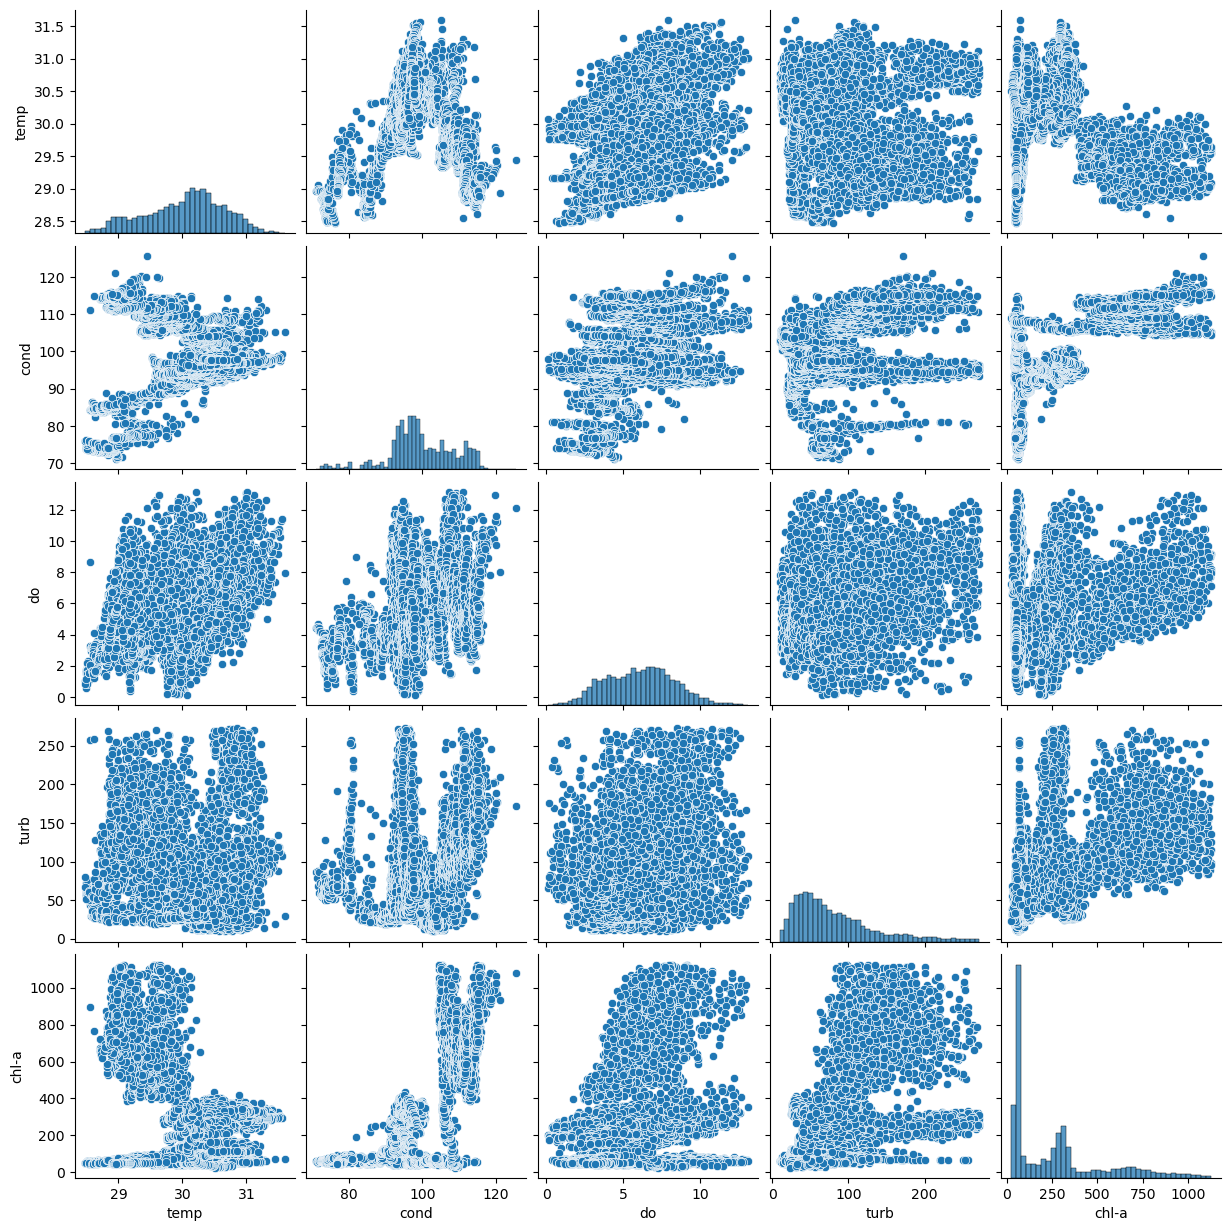

In [14]:
import seaborn as sns
sns.pairplot(dataset)

## Analyzing The Correlated Features

In [18]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

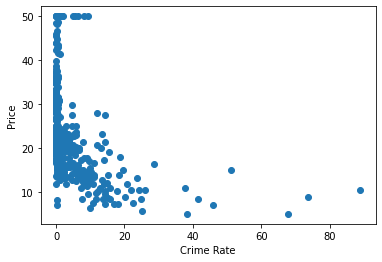

In [19]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

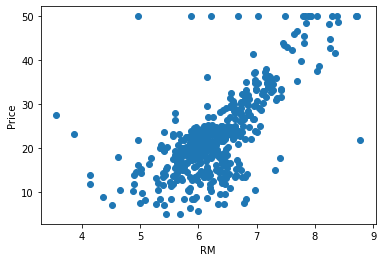

In [20]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

<AxesSubplot:xlabel='RM', ylabel='Price'>

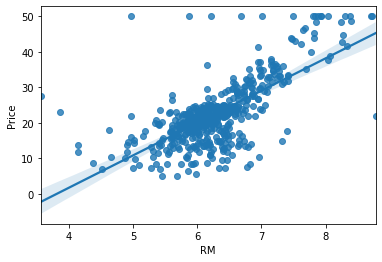

In [21]:
import seaborn as sns
sns.regplot(x="RM",y="Price",data=dataset)

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

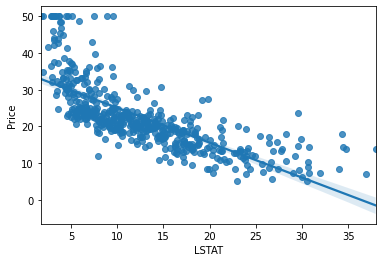

In [22]:
sns.regplot(x="LSTAT",y="Price",data=dataset)

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

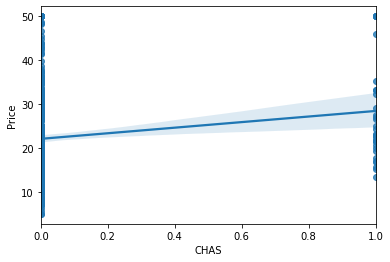

In [23]:
sns.regplot(x="CHAS",y="Price",data=dataset)

<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

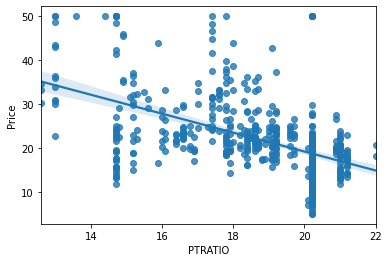

In [24]:
sns.regplot(x="PTRATIO",y="Price",data=dataset)

In [6]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [7]:
X.head()

,temp,cond,do,turb
0,29.55674,92.12651,6.491213,32.86783
1,29.59175,92.22813,6.724226,24.30492
2,29.57693,91.93182,6.677357,47.46174
3,29.63118,92.45161,7.540924,55.04100
4,29.64378,92.78736,7.629431,26.58170


In [8]:
y.head()

0    39.64875
1    40.57396
2    40.88269
3    46.67803
4    47.05107
Name: chl-a, dtype: float64

In [9]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train

,temp,cond,do,turb
764,30.32168,98.96487,8.315138,51.94894
6859,29.66508,106.13590,6.988386,81.16022
2302,30.40038,104.60590,5.391158,17.83736
4028,31.41670,97.97435,10.415630,92.92220
7610,29.50037,113.16470,4.526015,112.36400
...,...,...,...,...
5734,30.82338,97.11352,4.425652,93.41623
5191,30.25597,94.63959,5.420728,29.72184
5390,30.20605,97.34414,3.452328,100.52400
860,30.15641,99.66389,6.934586,59.60160


In [17]:
y_train

764      72.19130
6859    608.62940
2302     62.70645
4028    292.42640
7610    652.53000
          ...    
5734    136.42370
5191    306.91620
5390    271.12920
860      62.02115
7270    821.62750
Name: chl-a, Length: 6812, dtype: float64

In [18]:
X_test

,temp,cond,do,turb
7943,28.98887,111.37280,5.457247,135.84330
1803,30.53115,99.19721,5.971825,81.26141
4362,30.68297,98.67989,6.119412,104.99130
5982,28.92548,73.53803,3.763994,69.54114
1061,30.35156,101.83990,5.237751,42.03067
...,...,...,...,...
4001,31.32103,98.72392,5.019619,88.05146
3615,30.79616,93.70149,10.519980,223.40220
8313,28.98217,114.56410,7.961552,176.04330
549,30.17073,97.36280,8.690042,110.27430


In [10]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
X_train=scaler.fit_transform(X_train)

In [12]:
X_test=scaler.transform(X_test)

In [13]:
import pickle
pickle.dump(scaler,open('scalingf.pkl','wb'))

In [22]:
X_train

array([[ 0.46268568, -0.06683891,  0.95413966, -0.55944707],
       [-0.60391784,  0.74409932,  0.37118462, -0.02935215],
       [ 0.59052865,  0.57107878, -0.33061354, -1.17846736],
       ...,
       [ 0.27485235, -0.25011968, -1.18250653,  0.32204091],
       [ 0.19421543,  0.01220999,  0.3475457 , -0.42057482],
       [-0.86853818,  1.07361863,  0.04194415,  0.84226063]])

In [24]:
X_test

array([[-1.70237652,  1.33631583, -0.30157502,  0.96297761],
       [ 0.80295592, -0.04056466, -0.07547712, -0.02751587],
       [ 1.04957753, -0.09906596, -0.0106296 ,  0.40310867],
       ...,
       [-1.71326023,  1.69720501,  0.79877925,  1.692484  ],
       [ 0.21747733, -0.24800951,  1.11886689,  0.49897888],
       [ 1.02441504,  1.08343444,  0.53325269, -0.33011076]])

## Model Training

In [23]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict

In [24]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

In [31]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l2',
    'learning_rate': 0.01,
    #'feature_fraction': 0.9,
    #'bagging_fraction': 0.7,
    #'bagging_freq': 10,
    'verbosity': -1,
    #"max_depth": 8,
    "num_leaves": 48,  
    #"max_bin": 512,
    "num_iterations": 1000000,
    "colsample_bytree" : 0.9513641447571184,
    "subsample" : 0.502131626930973,
    "num_threads" : 0,
    "reg_alpha" : 9.875974765697835,
    "min_sum_hessian_in_leaf" : 9.037262284717054,
    "reg_lambda " : 0.0019007755683597173,
    "n_estimators" : 4720,
    "random_state" : 42

}

In [ ]:
hyper_params= {   
    
        learning_rate                    : 0.01
        num_leaves                       : 48
        colsample_bytree                 : 0.9513641447571184
        subsample                        : 0.502131626930973
        verbosity                        : -1
        random_state                     : 42
        objective                        : regression
        metric                           : l2
        num_threads                      : 0
        reg_alpha                        : 9.875974765697835
        min_sum_hessian_in_leaf          : 9.037262284717054
        reg_lambda                       : 0.0019007755683597173
        n_estimators                     : 4720
 }

In [32]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [33]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l2',
        early_stopping_rounds=1000)

d:\anaconda\envs\tens\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\anaconda\envs\tens\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[1]	valid_0's l2: 69803.2
[2]	valid_0's l2: 68546.5
[3]	valid_0's l2: 67313.1
[4]	valid_0's l2: 66106.1
[5]	valid_0's l2: 64926.4
[6]	valid_0's l2: 63765.1
[7]	valid_0's l2: 62630.6
[8]	valid_0's l2: 61507.6
[9]	valid_0's l2: 60415.7
[10]	valid_0's l2: 59340
[11]	valid_0's l2: 58294.3
[12]	valid_0's l2: 57269.6
[13]	valid_0's l2: 56256.5
[14]	valid_0's l2: 55269.1
[15]	valid_0's l2: 54303.5
[16]	valid_0's l2: 53352.7
[17]	valid_0's l2: 52422.6
[18]	valid_0's l2: 51502.1
[19]	valid_0's l2: 50608.5
[20]	valid_0's l2: 49735.6
[21]	valid_0's l2: 48875.8
[22]	valid_0's l2: 48030.8
[23]	valid_0's l2: 47204.7
[24]	valid_0's l2: 46388.4
[25]	valid_0's l2: 45583.2
[26]	valid_0's l2: 44812
[27]	valid_0's l2: 44044.2
[28]	valid_0's l2: 43290.5
[29]	valid_0's l2: 42552.7
[30]	valid_0's l2: 41835.6
[31]	valid_0's l2: 41127.1
[32]	valid_0's l2: 40433.1
[33]	valid_0's l2: 39749.7
[34]	valid_0's l2: 39083.5
[35]	valid_0's l2: 38430.4
[36]	valid_0's l2: 37790.6
[37]	valid_0's l2: 37164.8
[38]	valid_0's

LGBMRegressor(colsample_bytree=0.9513641447571184, learning_rate=0.01,
              metric='l2', min_sum_hessian_in_leaf=9.037262284717054,
              n_estimators=4720, num_iterations=1000000, num_leaves=48,
              num_threads=0, objective='regression', random_state=42,
              reg_alpha=9.875974765697835, reg_lambda =0.0019007755683597173,
              subsample=0.502131626930973, task='train', verbosity=-1)

In [28]:
regression=LinearRegression()

In [29]:
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
## print the coefficients and the intercept
print(regression.coef_)

[-93.06196732 130.66892786  19.33019081  98.96809865]


In [31]:
print(regression.intercept_)

277.5369896881523


In [32]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [33]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [34]:
reg_pred

array([699.66749103, 192.68124895, 206.28143735,  17.93476715,
       181.5488009 , 193.36037375, 426.96490228, 112.09119391,
       513.74221608,  41.44401585,  49.76582759, 295.3884472 ,
       304.43542544,  42.55103039, 111.96412804, 280.47885903,
       188.91270815, 175.53554512, 108.76642701, 100.2267009 ,
       737.01779964, 157.88957322, 116.32715519, 302.7440955 ,
       197.01898092, 168.44385108, 107.50822585,  29.89930953,
       358.19033794, 110.54391718, 194.44975387, 229.74467983,
       606.54337599, 728.32048474, 528.51217762,  50.76522981,
       105.30097459, 180.63637291, 127.28403177, 582.72221965,
       454.46763874,  99.80267802, 224.08422043, 142.59862097,
       182.37428281, 398.21973413, 159.47323373, 269.8694721 ,
       520.28299813, 207.78792758, 225.4361989 , 236.66293392,
       166.57750146,  90.39632758, 199.0977027 ,  40.00553726,
       158.33352119, 182.90975124,  48.60281368, 781.24107742,
       236.5766232 , 166.37861019, 838.41121056, 172.42

## Assumptions

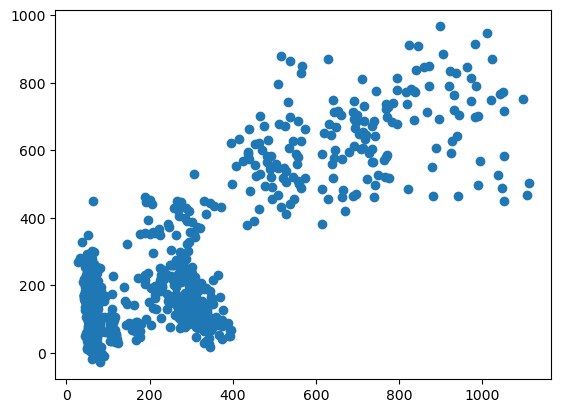

In [35]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [36]:
## Residuals
residuals=y_test-reg_pred

In [37]:
residuals

7943   -161.038191
1803   -131.112429
4362    118.003663
5982     51.286323
1061   -127.220431
           ...    
1665    -99.649894
7352    -66.543316
3295     80.792916
8256    334.714457
2233    -98.410011
Name: chl-a, Length: 852, dtype: float64

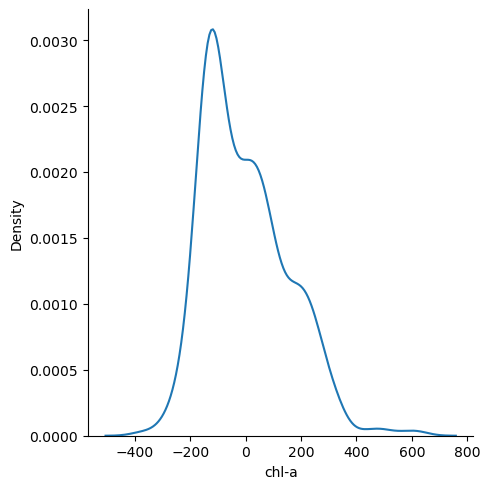

In [38]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

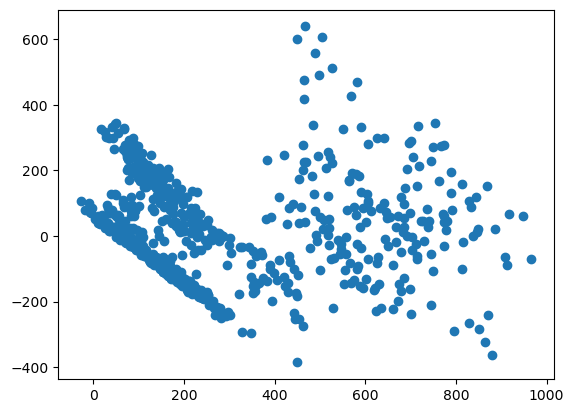

In [39]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

125.38392263032698
23551.414633589793
153.46470158831247


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [41]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6556825998740219


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [42]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6540565436750798

## New Data Prediction

In [44]:
dataset[0].reshape(1,-1)

KeyError: 0

In [53]:
##transformation of new data
scaler.transform(boston.data[0].reshape(1,-1))

array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [54]:
regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.08649576])

## Pickling The Model file For Deployment

In [55]:
import pickle

In [56]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [57]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [58]:
## Prediction
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.08649576])